In [16]:
from SlitSpectra3 import SlitSpectra as SS
import warnings
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
warnings.filterwarnings('ignore')
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## STEPS TO COMPLETE EXTRACTION ON IMAGES:

###### Step 1 - Determine Apertures + Setup Basic Database:

###### In pyraf:

- Create image + _coords.txt file with upper ap, lower ap, followed by 4 background coords, for each aperture in order from 1+. This can be done inside ds9, using the 'c' key. Order of background coordinates does not matter, but do upper, then lower coordinates in that order.

- Run apall, add one test aperture and save to database, creating a mock base file inside database. At this point, you can change any fundamental components of your extraction. This will generated a file inside your database folder of the form ap+image.

###### In python:
- Define image parameters

###### Step 3 - Find true trace_center:
###### In python: find initial trace_center
- Define an initial trace_center.
    - Run previous cell again until all centers correct.

###### Once satisfied with initial trace_center:
- Add buildbasedatabase() to previous cell to create database file with initial center on 1st aperture

###### In pyraf: use apall to find true trace center + generate good trace function
- Run apall on 1st database file just created.
- Center aperture
- Input this center into python trace_center variable.
- Run trace, save to database, do not extract.

###### Step 4 - In python:
- Run builddatabase()
    - Creates database with all apertures, with correct fitted traces + centers

###### Step 5 - In pyraf:
- Run apall on all apertures
- Check backgrounds and centers
- Extract all apertures, basename = imagename.
- If you made any changes inside apall, make sure to adjust them in your files (since this program won't know).

###### Step 6 - aperture & spectra plots.

- plotSpectra() plotImage() & plotImageWavelength() & plotWavelengthSpectra()

###### Step 7 finalizeFiles()
- Finalize files with date them and add any neccissary info to the file names.
- Make sure to copy your plots into the dated finalized directory, if you want them in there too.

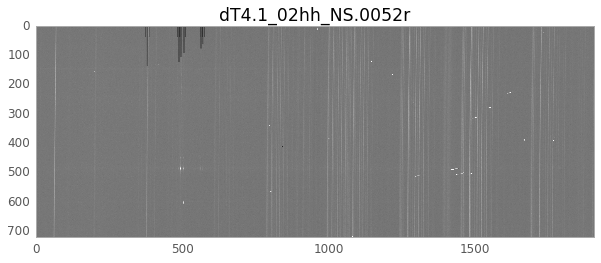

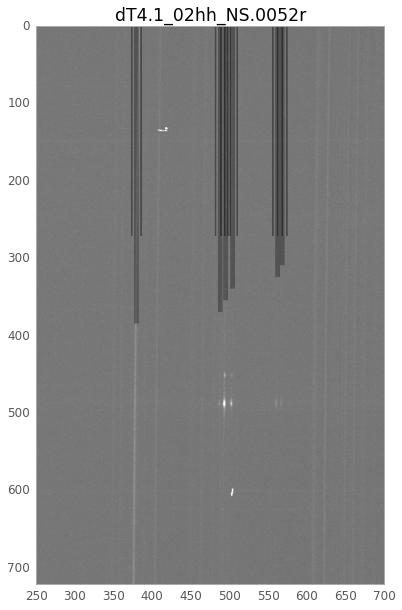

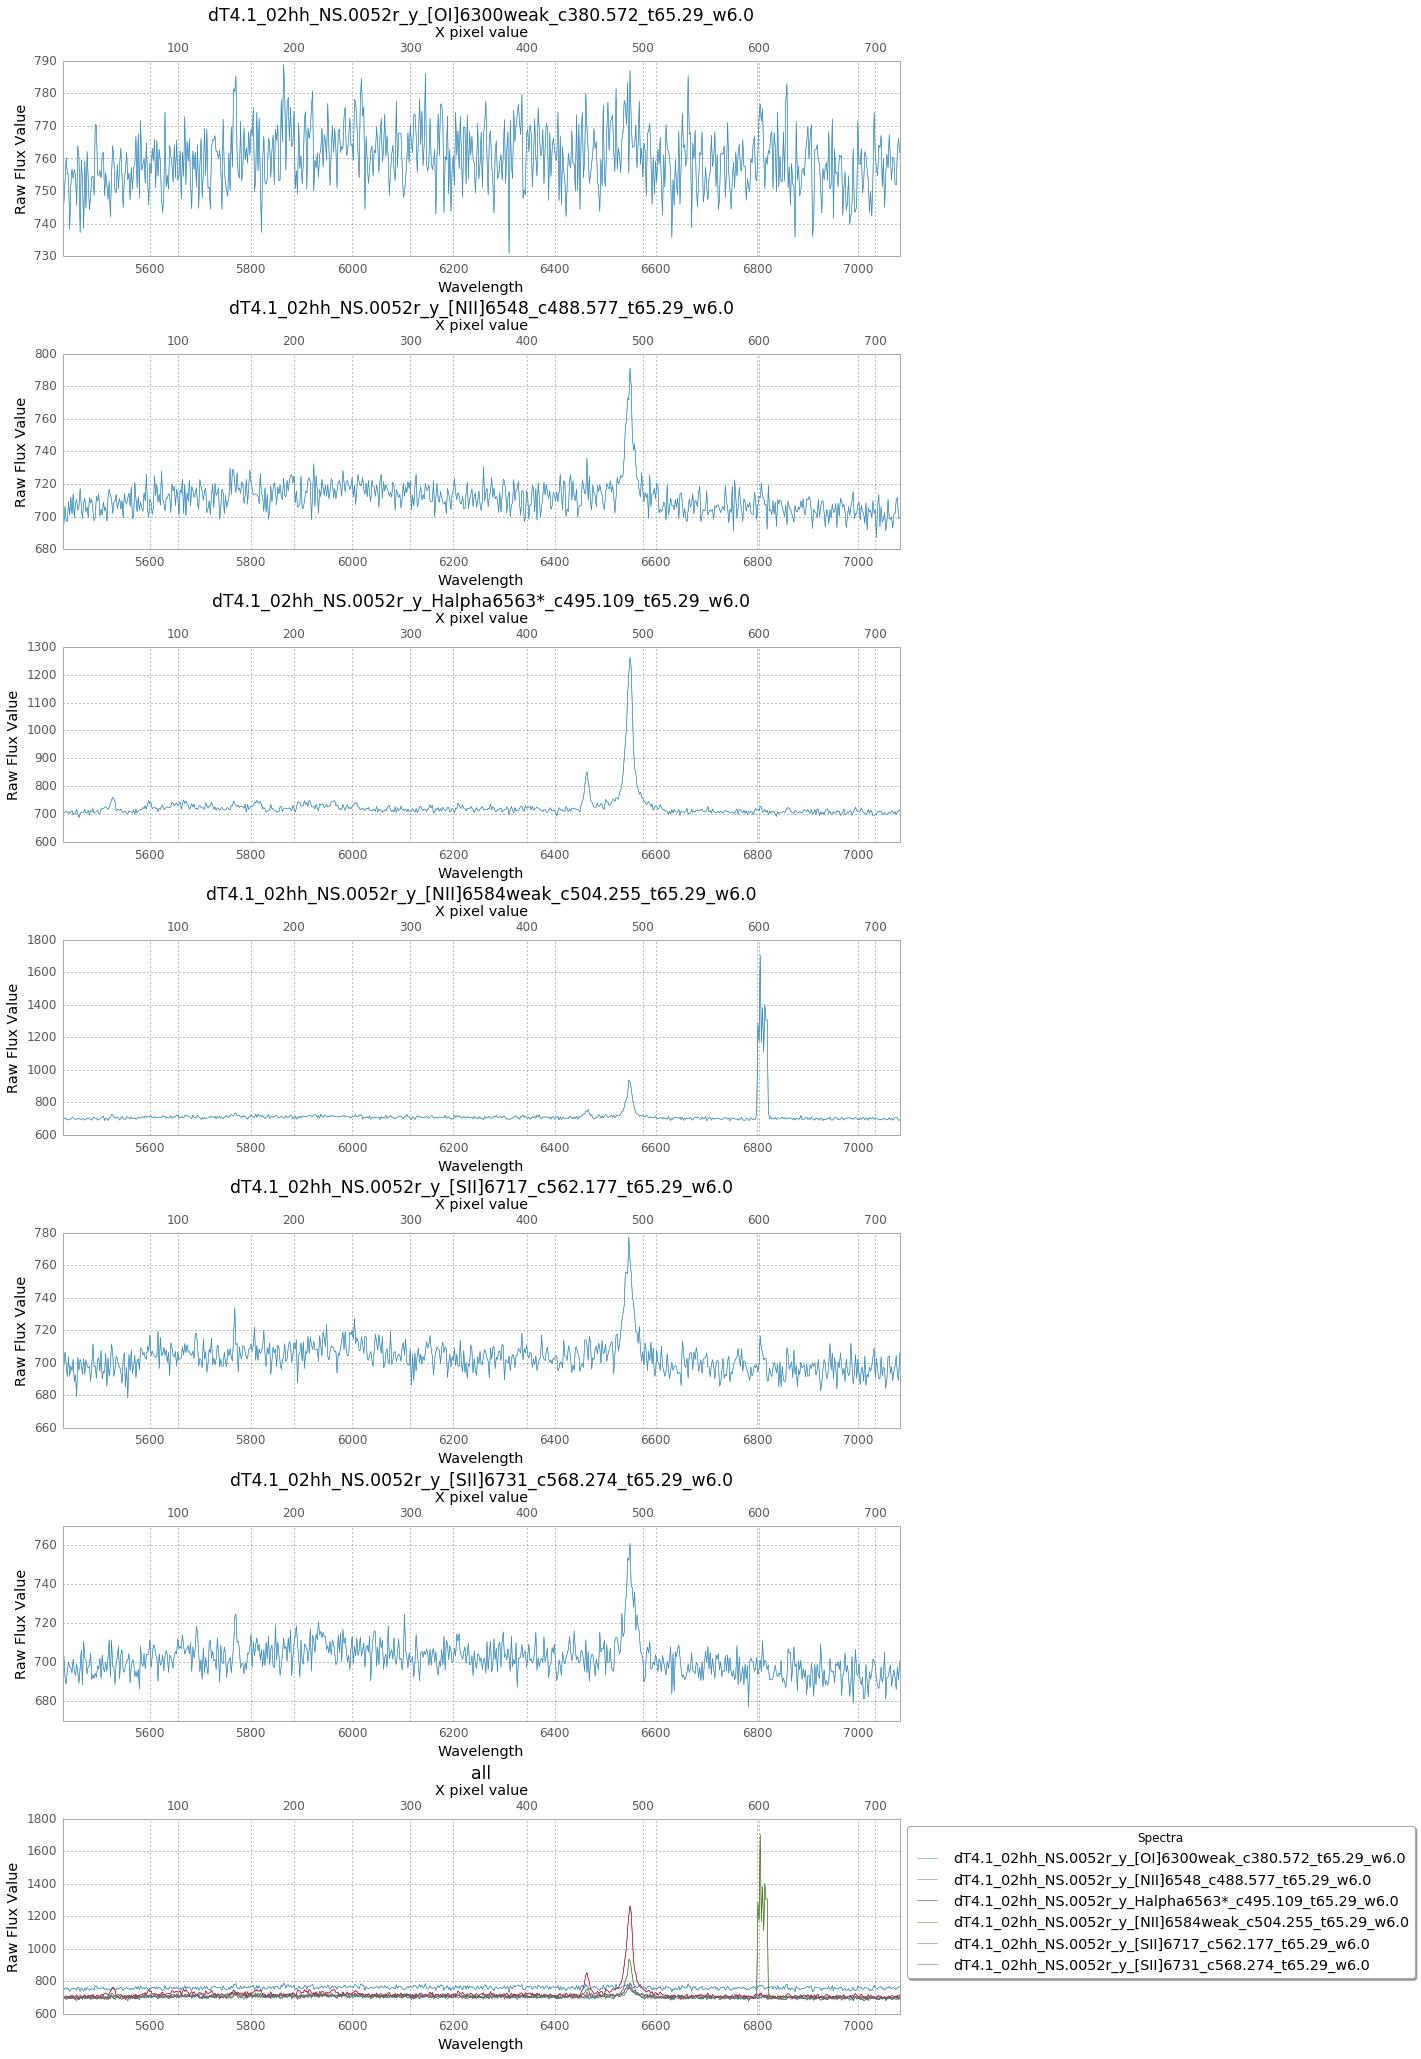

In [17]:
image = 'dT4.1_02hh_NS.0052r'
# image_to_write = 'dT4.1_02hh_NS.0052r'

channel = image[-1]
# This should match your image. Usually of the form 'r' or 'b'. Based on 3.5m r300 channel b400 channel

dir_ = '/Users/amielpatton-hall/Desktop/Research/Levesque/NGC6946/data2.0/apall4_y/'
#directory of data

full_region = [1,2098,1,1078]
#Of the form x1:x2 y1:y2.

center_width = 10
#width of center extraction automatically built
trace_center = 0
#initially set before know value.

trim_region_r=[15,1920,99,819]
full_lowest_r=83.5
full_highest_r=834.5

trim_region_b=[210,1990,210,888]
full_lowest_b=195
full_highest_b=903.5

if channel == 'r':
    trace_center = 65.29
    trim_region = trim_region_r
    full_lowest = full_lowest_r
    full_highest = full_highest_r
    w1 =  5428.431 #starting wavelength
    w2 =  9802.673 #ending wavelength
    dw =  2.29619 #wavelength intervel per pixel
    nw =  1906 #number of output pixels

if channel == 'b':
    trace_center = 1458.02
    trim_region = trim_region_b
    full_lowest = full_lowest_b
    full_highest = full_highest_b
    w1 =  2926.267 #starting wavelength
    w2 =  6165.38 #ending wavelength
    dw =  1.819726 #wavelength intervel per pixel
    nw =  1781 #number of output pixels

trim_base_vs_transfer_fit = [0.94335225214255913, 0.81555279062263253]
c1,c2 = trim_base_vs_transfer_fit

T = SS(image=image,
       channel=channel,
       path=dir_,
       full_region=full_region,
       trim_region=trim_region,
       direction='y',
       full_lowest=full_lowest,
       full_highest=full_highest,
       trace_center=trace_center,
       SN_width=center_width,
       w1=w1,w2=w2,dw=dw)

#blue channel
# [OII] 3727*
# [OIII] 4363 (weak)
# He II 4686 (weak)
# Hbeta 4861*
# [OIII] 4959
# [OIII] 5007*

#red channel
# [OI] 6300 (weak)
# [NII] 6548
# Halpha 6563*
# [NII] 6584 (weak)
# [SII] 6717
# [SII] 6731

wavelength_widths = [6,6,6,6,6,6]

if channel == 'b':
    wavelengths = [3727, 4363, 4686, 4861, 4959, 5007]   #"blue" wavelengths
    wavelength_names = [r'[OII]3727*', r'[OIII]4363weak', r'HeII4686weak', r'Hbeta4861*', r'[OIII]4959',r'[OIII]5007*'] #first half
    wavelength_widths = [6,6,6,6,6,6]

if channel == 'r':
    wavelengths = [6300, 6548, 6563, 6584, 6717, 6731]     #red wavelengths
    wavelength_names = [r'[OI]6300weak',r'[NII]6548',r'Halpha6563*',r'[NII]6584weak',r'[SII]6717',r'[SII]6731']
    wavelength_widths = [6,6,6,6,6,6]

pixel_backgrounds = []

it_ = 0
while it_ < len(wavelengths):
    pixel_backgrounds.append([-7,-5,5,7])
    it_ = it_ +1

#if y:
T.calculateWavelengths(wavelength_names, wavelengths, wavelength_widths, pixel_backgrounds, verbose=False)
T.plotImageWavelength(save_fig=True,verbose=False)

if channel == 'r':
    T.plotImageWavelength(x=[250,700],save_fig=True,verbose=False)
#     T.plotImageWavelength(x=[450,550],save_fig=True,verbose=False)
if channel == 'b':
    T.plotImageWavelength(x=[600,1300],save_fig=True,verbose=False)

#     T.buildotherdatabase(image_to_write=image_to_write,verbose=True)
#     T.buildbasedatabase(verbose=True, database_source=None)    #careful
#     T.builddatabase(verbose=True)      #careful (not completely fool-proof)

T.plotSpectra(verbose=False)
#     T.finalizeFiles(verbose=True)

In [ ]:
T.freakout()